In [1]:
import nltk
nltk.download('stopwords')

import spacy
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import os
import re
import fitz

# Path to JD folder
jd_folder = 'job_descriptions/'

# Dictionary to store {job_title: cleaned_text}
job_descriptions = {}

# Stopwords for cleaning
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove numbers, punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Read and clean each JD file
for filename in os.listdir(jd_folder):
    if filename.endswith('.txt'):
        path = os.path.join(jd_folder, filename)
        with open(path, 'r', encoding='utf-8') as file:
            content = file.read()
            cleaned = clean_text(content)
            job_title = filename.replace('.txt', '')  # e.g., "data_scientist"
            job_descriptions[job_title] = cleaned

# Preview
for role, text in job_descriptions.items():
    print(f"\n📌 {role.upper()}:\n{text[:200]}...")


📌 ANDROID_DEVELOPER:
job title android developer required skills java kotlin android studio firebase rest apis description hiring android developer proficient building native mobile apps using java kotlin experience andro...

📌 DATA_ANALYST:
job title data analyst required skills excel sql tableau python reporting description looking data analyst skilled working large datasets strong command excel functions sql queries data visualization ...

📌 DATA_SCIENTIST:
job title data scientist required skills python sql machine learning pandas visualization description seeking data scientist work structured unstructured data apply ml techniques build predictive mode...

📌 HR_MANAGER:
job title hr manager required skills communication recruitment excel ats tools description looking hr manager experienced end end recruitment employee onboarding team management must proficient using ...

📌 ML_ENGINEER:
job title machine learning engineer required skills python scikit learn tensorflow pandas apis 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Folder where resumes are stored
resume_folder = 'resumes/'

# Dictionary to store filename : cleaned_text
resumes_data = {}

# Loop through all files in resumes folder
for filename in os.listdir(resume_folder):
    file_path = os.path.join(resume_folder, filename)
    text = ""

    # PDF resume
    if filename.endswith('.pdf'):
        try:
            doc = fitz.open(file_path)
            for page in doc:
                text += page.get_text()
            doc.close()
        except Exception as e:
            print(f"Error reading PDF {filename}: {e}")
            continue

    # TXT resume
    elif filename.endswith('.txt'):
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
        except Exception as e:
            print(f"Error reading TXT {filename}: {e}")
            continue

    # Clean text and store
    cleaned = clean_text(text)
    resumes_data[filename] = cleaned

# ✅ Preview first few
for name, text in list(resumes_data.items())[:3]:
    print(f"\n📄 {name}:\n{text[:300]}...")


📄 Ankita_Raj.txt:
ankita raj email ankita dev gmail com phone github github com ankitaraj dev objective passionate software developer skilled java c strong dsa background skills java c oop git mysql spring boot experience java developer intern infosys built online bookstore app backend spring boot education b tech cs...

📄 Arjun_Nair.pdf:
...

📄 Karan_Kapoor.pdf:
...


In [4]:
import os
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

#  Text cleaning function (reuse for JD and resumes)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

#  Step 1: Load and clean Job Descriptions (JD)
jd_folder = 'job_descriptions/'   # Make sure this folder exists
jd_data = {}

for filename in os.listdir(jd_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(jd_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
                cleaned = clean_text(text)
                jd_data[filename] = cleaned
        except Exception as e:
            print(f"Error reading JD {filename}: {e}")

#  Step 2: Choose which JD to match resumes with
selected_jd_filename = "data_scientist.txt"  # change to your desired JD
selected_jd_text = jd_data[selected_jd_filename]

#  Step 3: Combine JD + all resumes for vectorization
documents = [selected_jd_text] + list(resumes_data.values())

#  Step 4: TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

#  Step 5: Cosine similarity between JD and each resume
similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

#  Step 6: Match % calculation
resume_names = list(resumes_data.keys())
match_scores = [(name, round(score * 100, 2)) for name, score in zip(resume_names, similarities)]

#  Step 7: Sort and display results
sorted_matches = sorted(match_scores, key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_matches, columns=["Resume", "Match %"])
print(df)


                Resume  Match %
0      Riya_Sharma.txt    33.76
1      Rahul_Mehra.txt    10.07
2       Ankita_Raj.txt     2.81
3   Sneha_Kulkarni.txt     1.92
4  Siddharth_Verma.txt     1.58
5       Arjun_Nair.pdf     0.00
6     Karan_Kapoor.pdf     0.00
7        Neha_Jain.pdf     0.00
8       Nikita_Das.pdf     0.00
9      Vivek_Sinha.pdf     0.00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
print("Available JD files:", list(jd_data.keys()))


Available JD files: ['android_developer.txt', 'data_analyst.txt', 'data_scientist.txt', 'hr_manager.txt', 'ml_engineer.txt', 'software_developer.txt', 'ui_ux_designer.txt', 'web_developer.txt']


In [7]:
!pip install hf_xet
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load pretrained BERT model (Tiny but accurate)
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and effective

# Step 1: Select JD
selected_jd_filename = "data_scientist.txt"  # Use correct lowercase name!
selected_jd_text = jd_data[selected_jd_filename]

# Step 2: Encode JD and Resumes using BERT
resume_texts = list(resumes_data.values())
resume_names = list(resumes_data.keys())

all_sentences = [selected_jd_text] + resume_texts
embeddings = model.encode(all_sentences)

# Step 3: Compute similarity between JD and each resume
jd_embedding = embeddings[0].reshape(1, -1)
resume_embeddings = embeddings[1:]

similarities = cosine_similarity(jd_embedding, resume_embeddings).flatten()

# Step 4: Format and sort results
match_scores = [(name, round(score * 100, 2)) for name, score in zip(resume_names, similarities)]
sorted_matches = sorted(match_scores, key=lambda x: x[1], reverse=True)

# Step 5: Show results
df = pd.DataFrame(sorted_matches, columns=["Resume", "Match %"])
print(df)

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 310.6 kB/s eta 0:00:07
   ------- -------------------------------- 0.5/2.7 MB 310.6 kB/s eta 0:00:07
   ------- -------------------------------- 0.5/2.7 MB 310.6 kB/s eta 0:00:07
   ----------- ---------------------------- 0.8/2.7 MB 342.2 kB/s eta 0:00:06
   ----------- ---------------------------- 0.8/2.7 MB 342

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

model = SentenceTransformer('all-MiniLM-L6-v2')

# Store final results
results = []

# Loop through every JD
for jd_name, jd_text in jd_data.items():
    jd_embedding = model.encode([jd_text])[0]

    # Loop through all resumes
    for resume_name, resume_text in resumes_data.items():
        resume_embedding = model.encode([resume_text])[0]

        # Compute similarity
        similarity = cosine_similarity(
            [jd_embedding], [resume_embedding]
        )[0][0]

        results.append({
            "JD": jd_name,
            "Resume": resume_name,
            "Match %": round(similarity * 100, 2)
        })

# Convert to DataFrame
df = pd.DataFrame(results)

# ✅ Optional: Sort by match %
df_sorted = df.sort_values(by="Match %", ascending=False)

print(df_sorted.head(15))  # Show top 15 matches

                        JD               Resume  Match %
38          hr_manager.txt   Sneha_Kulkarni.txt    72.44
26      data_scientist.txt      Riya_Sharma.txt    67.62
77       web_developer.txt  Siddharth_Verma.txt    67.58
50  software_developer.txt       Ankita_Raj.txt    66.33
45         ml_engineer.txt      Rahul_Mehra.txt    62.86
46         ml_engineer.txt      Riya_Sharma.txt    60.36
16        data_analyst.txt      Riya_Sharma.txt    57.57
0    android_developer.txt       Ankita_Raj.txt    53.53
7    android_developer.txt  Siddharth_Verma.txt    50.76
70       web_developer.txt       Ankita_Raj.txt    50.65
40         ml_engineer.txt       Ankita_Raj.txt    49.82
8    android_developer.txt   Sneha_Kulkarni.txt    49.11
48         ml_engineer.txt   Sneha_Kulkarni.txt    49.01
56  software_developer.txt      Riya_Sharma.txt    48.89
18        data_analyst.txt   Sneha_Kulkarni.txt    48.41


Matplotlib is building the font cache; this may take a moment.


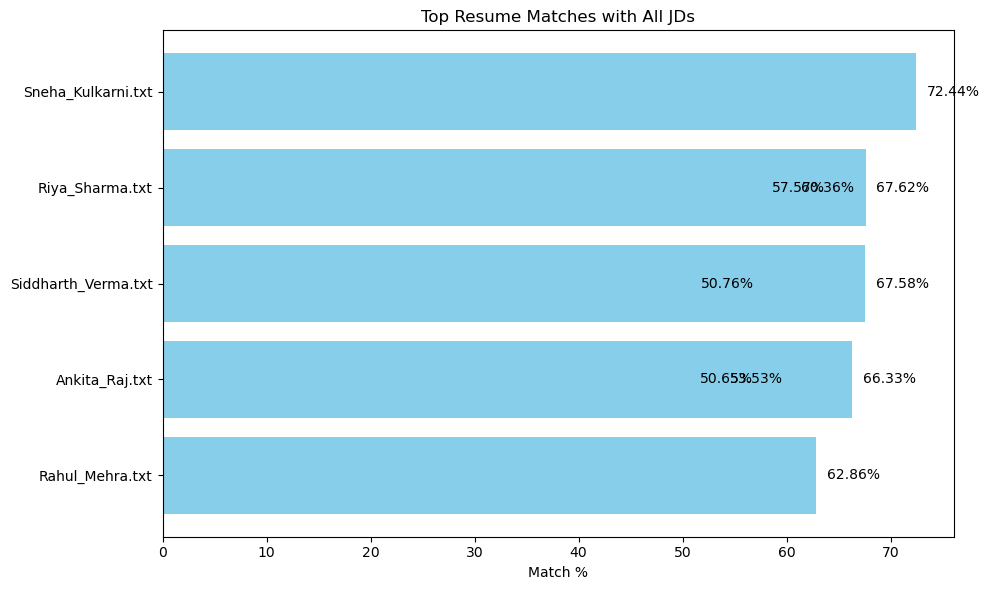

In [11]:
import matplotlib.pyplot as plt

# Step: Filter top N matches
top_n = 10
top_matches = df_sorted.head(top_n)

# Step: Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_matches["Resume"],
    top_matches["Match %"],
    color='skyblue'
)

# Add match % labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width}%', va='center')

plt.xlabel("Match %")
plt.title("Top Resume Matches with All JDs")
plt.gca().invert_yaxis()  # highest match on top
plt.tight_layout()
plt.show()